<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/Champagne2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install --upgrade --no-deps statsmodels

     |████████████████████████████████| 9.8 MB 4.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


--2022-05-06 03:09:53--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1596 (1.6K) [text/plain]
Saving to: ‘monthly_champagne_sales.csv’

monthly_champagne_s 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-05-06 03:09:53 (27.4 MB/s) - ‘monthly_champagne_sales.csv’ saved [1596/1596]



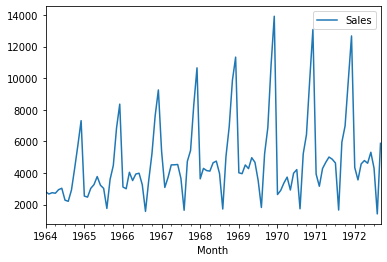

In [1]:
# load and plot the car sales dataset
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly_champagne_sales.csv
from pandas import read_csv
from matplotlib import pyplot
# load data
df = read_csv('monthly_champagne_sales.csv', index_col='Month', parse_dates=True)
# plot the time series
df.plot()
pyplot.show()

In [2]:
print(df.shape)
df

(105, 1)


,Sales
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


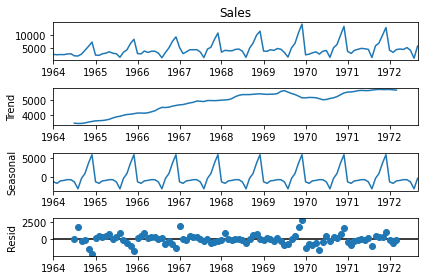

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df['Sales'],model='additive')
decompose_result.plot();

Challenge: Use last 47 months of data as test and get RMSE value less than 924.699 found in analysis having URL below.
https://machinelearningmastery.com/time-series-forecast-study-python-monthly-sales-french-champagne/

In [2]:
train = df['Sales'][:-47]
test = df['Sales'][-47:]
print("Full data shape is "+ str(df.shape))
print("Train data shape is "+ str(train.shape))
print("Test data shape is "+ str(test.shape))

Full data shape is (105, 1)
Train data shape is (58,)
Test data shape is (47,)


## **HOLT WINTERS**

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

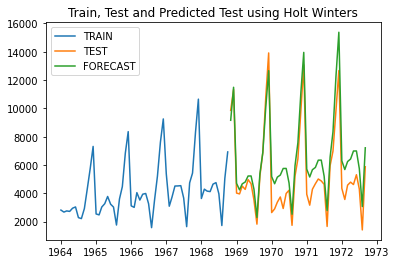

In [ ]:
import pandas as pd
import numpy as np
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fitted_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit().forecast(47)
plt.plot(train,label='TRAIN')
plt.plot(test,label='TEST')
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using Holt Winters')

In [ ]:
#Evaluate forecasting Performance
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

Mean Absolute Error = 1232.8846051934008
Mean Squared Error = 2042410.4954075639
Root Mean Squared Error = 1429.1292787594703
Mean Absolute Percentage Error = 80.24387885610417


## **TBATS**

In [10]:
!pip install tbats

     |████████████████████████████████| 43 kB 1.4 MB/s 
     |████████████████████████████████| 1.4 MB 7.0 MB/s 


In [11]:
from tbats import TBATS
import numpy as np
estimator = TBATS(
    seasonal_periods=[12],
    use_arma_errors=True,  # shall try only models with ARMA
    use_box_cox=True # will use Box-Cox
)
model = estimator.fit(train)

Mean Absolute Error = 682.4765341048537
Mean Squared Error = 839325.8286071263
Root Mean Squared Error = 916.1472745182001
Mean Absolute Percentage Error = 15.279811258613718


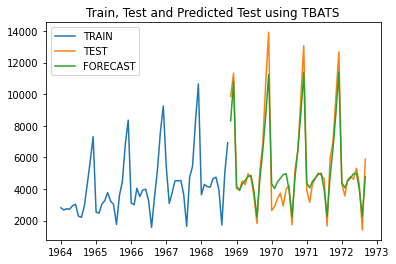

In [12]:
import pandas as pd
from matplotlib import pyplot as plt
test_predictions = model.forecast(steps=47)
from sklearn.metrics import mean_absolute_error,mean_squared_error
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
def mape(actual,pred):
    return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

#916.14727451
test_predictions=pd.DataFrame(test_predictions)
new_index = test.index
test_predictions=test_predictions.set_index(new_index)
test_predictions.columns=['SALES']
plt.plot(train,label='TRAIN')
plt.plot(test,label='TEST')
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using TBATS');

# **ETS**

In [4]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
a=["add","mul"]
for t in [True,False]:
 for x in a:
  for y in a:
    for z in a:
      print(x)
      print(y)
      print(z)
      print(t)
      tr_predictions=ETSModel(train,error=x, trend=y,seasonal=z,damped_trend=t, seasonal_periods=12).fit().fittedvalues()
      print(f'Mean Absolute Error = {mean_absolute_error(train,tr_predictions)}')
      mse=mean_squared_error(train,tr_predictions)
      rmse=np.sqrt(mse)
      print(f'Mean Squared Error = {mse}')
      print(f'Root Mean Squared Error = {rmse}')
      import numpy as np
      def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
      print(f'Mean Absolute Percentage Error = {mape(np.array(train),np.array(tr_predictions) )}')

add
add
add
True
Mean Absolute Error = 899.2401915826421
Mean Squared Error = 1596800.2974199029
Root Mean Squared Error = 1263.6456375977812
Mean Absolute Percentage Error = 25.15803294864945
add
add
mul
True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 262.88511360077683
Mean Squared Error = 147941.00425592062
Root Mean Squared Error = 384.63099752349734
Mean Absolute Percentage Error = 7.32833383602783
add
mul
add
True
Mean Absolute Error = 986.9934170112916
Mean Squared Error = 2025043.1447454698
Root Mean Squared Error = 1423.04010651333
Mean Absolute Percentage Error = 27.23404226610923
add
mul
mul
True
Mean Absolute Error = 262.1803053846251
Mean Squared Error = 146822.0697509211
Root Mean Squared Error = 383.17368092148644
Mean Absolute Percentage Error = 7.289268826280199
mul

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



add
add
True
Mean Absolute Error = 1728.9458307611872
Mean Squared Error = 5932997.280391371
Root Mean Squared Error = 2435.7744723991527
Mean Absolute Percentage Error = 50.90510336406099
mul
add
mul
True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 330.6728881306101
Mean Squared Error = 182765.87051303193
Root Mean Squared Error = 427.51125191394897
Mean Absolute Percentage Error = 9.493227923639894
mul
mul
add
True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 2766.1951786564423
Mean Squared Error = 11979716.27272213
Root Mean Squared Error = 3461.172673057808
Mean Absolute Percentage Error = 78.1116142949746
mul
mul
mul
True
Mean Absolute Error = 355.61711335683214
Mean Squared Error = 202556.1745678311
Root Mean Squared Error = 450.0624118584345
Mean Absolute Percentage Error = 9.937429870369753
add
add
add
False


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 1240.514865624162
Mean Squared Error = 3090293.671238965
Root Mean Squared Error = 1757.9231130055048
Mean Absolute Percentage Error = 36.90681230636492
add
add
mul
False
Mean Absolute Error = 239.85827610528145
Mean Squared Error = 115693.84989766455
Root Mean Squared Error = 340.1379865549635
Mean Absolute Percentage Error = 7.0012899905095916
add
mul
add
False
Mean Absolute Error = 1258.0254935354887
Mean Squared Error = 3238387.2659863466
Root Mean Squared Error = 1799.5519625691131
Mean Absolute Percentage Error = 36.45009979519797
add
mul
mul
False


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 282.6129650120612
Mean Squared Error = 153585.73290857137
Root Mean Squared Error = 391.90015681110845
Mean Absolute Percentage Error = 8.134658396998656
mul
add
add
False
Mean Absolute Error = 1743.031757542495
Mean Squared Error = 6467357.901513772
Root Mean Squared Error = 2543.1000573146493
Mean Absolute Percentage Error = 52.47480229090692
mul
add
mul
False


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 323.24153450676687
Mean Squared Error = 193847.05177753916
Root Mean Squared Error = 440.28065115053505
Mean Absolute Percentage Error = 9.322311357479373
mul
mul
add
False
Mean Absolute Error = 1859.5827915550417
Mean Squared Error = 8220134.122422892
Root Mean Squared Error = 2867.0776275543867
Mean Absolute Percentage Error = 58.696846452812835
mul
mul
mul
False


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 316.2311798021057
Mean Squared Error = 181904.92256125712
Root Mean Squared Error = 426.50313312009456
Mean Absolute Percentage Error = 9.196709676888492


Damped Trend False

In [22]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_predictions=ETSModel(train,error='add', trend='add',seasonal='mul',damped_trend=False, seasonal_periods=12).fit().forecast(47)
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
import numpy as np
def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 1127.170422499744
Mean Squared Error = 1692936.4406313219
Root Mean Squared Error = 1301.1289100743716
Mean Absolute Percentage Error = 28.627113441654007


Damped Trend True

In [23]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_predictions=ETSModel(train,error='add', trend='add',seasonal='mul',damped_trend=True, seasonal_periods=12).fit().forecast(47)
print(f'Mean Absolute Error = {mean_absolute_error(test,test_predictions)}')
mse=mean_squared_error(test,test_predictions)
rmse=np.sqrt(mse)
print(f'Mean Squared Error = {mse}')
print(f'Root Mean Squared Error = {rmse}')
import numpy as np
def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(test_predictions) )}')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 611.0719414997002
Mean Squared Error = 717647.8166265619
Root Mean Squared Error = 847.1409662072552
Mean Absolute Percentage Error = 14.149428205994703


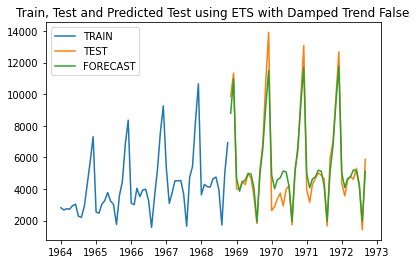

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
test_predictions=pd.DataFrame(test_predictions)
new_index = test.index
test_predictions=test_predictions.set_index(new_index)
test_predictions.columns=['SALES']
plt.plot(train,label='TRAIN')
plt.plot(test,label='TEST')
plt.plot(test_predictions,label='FORECAST')
plt.legend(loc="upper left")
plt.title('Train, Test and Predicted Test using ETS with Damped Trend False');

In [17]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np
a=["add","mul"]
for t in [True,False]:
 for x in a:
  for y in a:
    for z in a:
      print(x)
      print(y)
      print(z)
      print(t)
      tr_predictions=ETSModel(train,error=x, trend=y,seasonal=z,damped_trend=t, seasonal_periods=12).fit().forecast(47)
      print(f'Mean Absolute Error = {mean_absolute_error(test,tr_predictions)}')
      mse=mean_squared_error(test,tr_predictions)
      rmse=np.sqrt(mse)
      print(f'Mean Squared Error = {mse}')
      print(f'Root Mean Squared Error = {rmse}')
      import numpy as np
      def mape(actual,pred):
            return np.mean(np.abs((actual - pred) / actual)) * 100  
      print(f'Mean Absolute Percentage Error = {mape(np.array(test),np.array(tr_predictions) )}')

add
add
add
True
Mean Absolute Error = 698.7986415940477
Mean Squared Error = 991395.3659597604
Root Mean Squared Error = 995.6883879807781
Mean Absolute Percentage Error = 13.252228692954526
add
add
mul
True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 611.0719414997002
Mean Squared Error = 717647.8166265619
Root Mean Squared Error = 847.1409662072552
Mean Absolute Percentage Error = 14.149428205994703
add
mul
add
True
Mean Absolute Error = 720.1277587602068
Mean Squared Error = 1061955.1310661186
Root Mean Squared Error = 1030.5120722563704
Mean Absolute Percentage Error = 13.208098963481198
add
mul
mul
True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 612.7108074101741
Mean Squared Error = 719576.2164150134
Root Mean Squared Error = 848.2783837956814
Mean Absolute Percentage Error = 14.044428405817113
mul
add
add
True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 992.5604969513819
Mean Squared Error = 1399545.025865141
Root Mean Squared Error = 1183.0236793340787
Mean Absolute Percentage Error = 24.941705521554006
mul
add
mul
True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 757.2354964453631
Mean Squared Error = 1030584.7208902489
Root Mean Squared Error = 1015.1771869433675
Mean Absolute Percentage Error = 17.841813006115398
mul
mul
add
True


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 2957.3647820099923
Mean Squared Error = 15326096.271252843
Root Mean Squared Error = 3914.8558429721065
Mean Absolute Percentage Error = 64.11592617143282
mul
mul
mul
True
Mean Absolute Error = 836.9616731905224
Mean Squared Error = 1165021.8124116496
Root Mean Squared Error = 1079.3617616034253
Mean Absolute Percentage Error = 23.023039763152315
add
add
add
False


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 3187.0330645221225
Mean Squared Error = 13068780.96903182
Root Mean Squared Error = 3615.076896696918
Mean Absolute Percentage Error = 84.15756133959556
add
add
mul
False
Mean Absolute Error = 1127.170422499744
Mean Squared Error = 1692936.4406313219
Root Mean Squared Error = 1301.1289100743716
Mean Absolute Percentage Error = 28.627113441654007
add
mul
add
False
Mean Absolute Error = 2177.7143581586556

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)



Mean Squared Error = 6169593.219800367
Root Mean Squared Error = 2483.8665865541907
Mean Absolute Percentage Error = 58.314871345555794
add
mul
mul
False
Mean Absolute Error = 932.4676468664796
Mean Squared Error = 1270407.3727706599
Root Mean Squared Error = 1127.123494906685
Mean Absolute Percentage Error = 23.567188578581842
mul
add
add
False


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 2240.635913876715
Mean Squared Error = 6373009.223441951
Root Mean Squared Error = 2524.4819713045986
Mean Absolute Percentage Error = 59.93805735073951
mul
add
mul
False
Mean Absolute Error = 852.1456424358028
Mean Squared Error = 1236633.4037641792
Root Mean Squared Error = 1112.0401988076596
Mean Absolute Percentage Error = 22.790559347686433
mul
mul
add
False


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 2271.6379530574045
Mean Squared Error = 6665249.172788406
Root Mean Squared Error = 2581.714386369725
Mean Absolute Percentage Error = 60.66238957709209
mul
mul
mul
False


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Mean Absolute Error = 1145.2157398219254
Mean Squared Error = 1904611.7817899578
Root Mean Squared Error = 1380.0767303994216
Mean Absolute Percentage Error = 30.09184279730559
